In [2]:
import pandas as pd 
import numpy as np

In [3]:
recipe =pd.read_csv('recipes.csv')
# recipe.head()

In [4]:
recipe.drop(
  ['RecipeYield', 'RecipeServings', 'ReviewCount', 'AggregatedRating',
   'RecipeIngredientParts', 'RecipeIngredientQuantities', 'DatePublished',
   'TotalTime', 'PrepTime', 'CookTime', 'AuthorName', 'AuthorId'],
  axis=1,
  inplace=True,
  errors='ignore'
)

In [5]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RecipeId             522517 non-null  int64  
 1   Name                 522517 non-null  object 
 2   Description          522512 non-null  object 
 3   Images               522516 non-null  object 
 4   RecipeCategory       521766 non-null  object 
 5   Keywords             505280 non-null  object 
 6   Calories             522517 non-null  float64
 7   FatContent           522517 non-null  float64
 8   SaturatedFatContent  522517 non-null  float64
 9   CholesterolContent   522517 non-null  float64
 10  SodiumContent        522517 non-null  float64
 11  CarbohydrateContent  522517 non-null  float64
 12  FiberContent         522517 non-null  float64
 13  SugarContent         522517 non-null  float64
 14  ProteinContent       522517 non-null  float64
 15  RecipeInstruction

In [6]:
recipe.isnull().sum()

RecipeId                   0
Name                       0
Description                5
Images                     1
RecipeCategory           751
Keywords               17237
Calories                   0
FatContent                 0
SaturatedFatContent        0
CholesterolContent         0
SodiumContent              0
CarbohydrateContent        0
FiberContent               0
SugarContent               0
ProteinContent             0
RecipeInstructions         0
dtype: int64

In [7]:
recipe.shape

(522517, 16)

In [8]:
recipe['Keywords'] = recipe['Keywords'].fillna('Unknown')
recipe['RecipeCategory']= recipe['RecipeCategory'].fillna('Unknown')


In [9]:
recipe.dropna(subset=['Images'], inplace=True)
recipe.dropna(subset=['Description'], inplace=True)

In [10]:
recipe.isnull().sum()

RecipeId               0
Name                   0
Description            0
Images                 0
RecipeCategory         0
Keywords               0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeInstructions     0
dtype: int64

In [11]:
recipe.head(5)

,RecipeId,Name,Description,Images,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [12]:
# till this null value and unnecessary columns are removed

In [13]:
import re

def parse_keywords(val):
    if pd.isnull(val):
        return []
    if val.startswith('c('):  # clean R-style c("...")
        val = re.sub(r'c\((.*?)\)', r'\1', val)
    return [kw.strip().strip('"').strip("'") for kw in val.strip("[]{}()").split(",")]

recipe['Keywords'] = recipe['Keywords'].apply(parse_keywords)


In [14]:
recipe['Keywords'].dropna().head(10)

0    [Dessert, Low Protein, Low Cholesterol, Health...
1    [Chicken Thigh & Leg, Chicken, Poultry, Meat, ...
2    [Low Protein, Low Cholesterol, Healthy, Summer...
3    [Beans, Vegetable, Low Cholesterol, Weeknight,...
4    [Low Protein, Vegan, Low Cholesterol, Healthy,...
5           [Dessert, Weeknight, Stove Top, < 4 Hours]
6                           [Poultry, Meat, < 60 Mins]
7       [Dessert, Healthy, Weeknight, Oven, < 4 Hours]
8                 [Thai, Asian, Free Of..., < 30 Mins]
9    [Cookie & Brownie, Fruit, Nuts, Weeknight, Ove...
Name: Keywords, dtype: object

In [15]:

recipe['RecipeCategory'].value_counts()

RecipeCategory
Dessert              62072
Lunch/Snacks         32586
One Dish Meal        31345
Vegetable            27231
Breakfast            21101
                     ...  
Snacks Sweet             1
Fish Salmon              1
Guatemalan               1
Coconut Cream Pie        1
Labor Day                1
Name: count, Length: 312, dtype: int64

In [16]:
health = pd.read_csv('health_fitness_dataset.csv')

In [17]:
health.head()


,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33


In [18]:
# selecting the important columns from the recipe dataset
recipe = recipe[['Name', 'Description', 'Images', 'RecipeInstructions', 'Keywords', 'RecipeCategory', 'Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent', 'SodiumContent', 'SugarContent', 'CholesterolContent']]

In [19]:
recipe.shape

(522512, 14)

In [20]:
#add the recipe type to the dataset
recipe['Type'] = np.random.choice(['Vegetarian', 'Non-Vegetarian'], size=len(recipe), p=[0.5, 0.5])


In [21]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522512 entries, 0 to 522516
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 522512 non-null  object 
 1   Description          522512 non-null  object 
 2   Images               522512 non-null  object 
 3   RecipeInstructions   522512 non-null  object 
 4   Keywords             522512 non-null  object 
 5   RecipeCategory       522512 non-null  object 
 6   Calories             522512 non-null  float64
 7   FatContent           522512 non-null  float64
 8   CarbohydrateContent  522512 non-null  float64
 9   ProteinContent       522512 non-null  float64
 10  FiberContent         522512 non-null  float64
 11  SodiumContent        522512 non-null  float64
 12  SugarContent         522512 non-null  float64
 13  CholesterolContent   522512 non-null  float64
 14  Type                 522512 non-null  object 
dtypes: float64(8), object(

In [22]:
import re

# Define non-veg keywords as a set for fast lookup
non_veg_keywords = {
    # Common meats
    'chicken', 'mutton', 'beef', 'pork', 'lamb', 'goat', 'veal', 'turkey', 'duck', 'goose',

    # Seafood (fish)
    'fish', 'tuna', 'salmon', 'anchovy', 'anchovies', 'sardine', 'mackerel', 'trout',
    'tilapia', 'cod', 'catfish', 'halibut', 'snapper', 'sole', 'bass', 'herring', 'pollock',

    # Shellfish & crustaceans
    'shrimp', 'prawn', 'prawns', 'crab', 'lobster', 'clam', 'clams', 'oyster', 'oysters',
    'mussels', 'scallop', 'scallops', 'squid', 'octopus', 'calamari', 'shellfish',

    # Eggs and related
    'egg', 'eggs', 'boiled egg', 'poached egg', 'fried egg', 'scrambled egg',
    'omelette', 'frittata', 'deviled egg', 'quiche',

    # Processed meats
    'bacon', 'ham', 'sausage', 'salami', 'pepperoni', 'pastrami', 'prosciutto',
    'meatballs', 'frankfurter', 'weiners','weiner','hambuger', 'hotdog', 'hot dog', 'luncheon meat',

    # Cooking terms and cuts
    'cutlet', 'drumstick', 'steak', 'roast', 'fillet', 'tenderloin', 'brisket',
    'ribs', 'mince', 'keema', 'kebab', 'bolognese', 'giblets', 'terrine', 'pate', 'goulash',

    # Broths, fats, sauces
    'meat', 'meaty', 'bone broth', 'chicken broth', 'beef broth', 'fish broth',
    'fish sauce', 'oyster sauce', 'lard', 'suet', 'gravy', 'stock', 'bouillon', 'gelatin',

    # Game meats and exotic
    'venison', 'boar', 'rabbit', 'frog', 'alligator', 'buffalo', 'camel', 'kangaroo',

    # Ambiguous/fast food items
    'burger', 'nuggets', 'corned beef', 'jerky', 'spam', 'shawarma', 'tikka', 'tandoori'
}

# Precompiled regex pattern to extract words efficiently
word_pattern = re.compile(r'\b\w+\b')

# Function to extract lowercase words from a string or list of strings
def extract_words_from_column(data):
    words = set()
    if isinstance(data, str):
        words.update(word_pattern.findall(data.lower()))
    elif isinstance(data, list):
        for item in data:
            if isinstance(item, str):
                words.update(word_pattern.findall(item.lower()))
    return words

# Function to classify recipe as Vegetarian or Non-Vegetarian
def classify_veg(row):
    fields = ['Name', 'Description', 'Keywords', 'RecipeInstructions', 'RecipeCategory', 'RecipeIngredientParts']
    combined_words = set()
    for field in fields:
        combined_words |= extract_words_from_column(row.get(field, ''))
    
    return 'Non-Vegetarian' if non_veg_keywords & combined_words else 'Vegetarian'

# Apply classification
recipe['Type'] = recipe.apply(classify_veg, axis=1)

# Optional: View result count
print(recipe['Type'].value_counts())


Type
Non-Vegetarian    337617
Vegetarian        184895
Name: count, dtype: int64


In [23]:
print(recipe['RecipeCategory'].value_counts())

RecipeCategory
Dessert              62072
Lunch/Snacks         32586
One Dish Meal        31345
Vegetable            27231
Breakfast            21101
                     ...  
Snacks Sweet             1
Fish Salmon              1
Guatemalan               1
Coconut Cream Pie        1
Labor Day                1
Name: count, Length: 312, dtype: int64


In [24]:
print(recipe['RecipeInstructions'].value_counts())

RecipeInstructions
"Blend all ingredients until smooth."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [25]:
# # writing the dataset values in to lowercase
recipe['RecipeCategory'] = recipe['RecipeCategory'].str.lower()

# recipe['Keywords']=recipe['Keywords'].str.lower()
recipe['Name'] = recipe['Name'].str.lower()
recipe['Description'] = recipe['Description'].str.lower()
# recipe['RecipeInstructions'] = recipe['RecipeInstructions'].str.lower()
recipe['Type']=recipe['Type'].str.lower()

In [26]:
print(recipe['Type'].value_counts())


Type
non-vegetarian    337617
vegetarian        184895
Name: count, dtype: int64


In [27]:
print(recipe['Images'].value_counts(10))

Images
character(0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [28]:
import pandas as pd

def parse_r_list(val):
    if pd.isna(val):
        return []
    val = val.strip()
    if val.startswith("c(") and val.endswith(")"):
        val = val[2:-1]  # Remove c( and )
    # Split by comma, strip quotes and whitespace
    items = [item.strip().strip('"').strip("'") for item in val.split(',')]
    return items


In [29]:
recipe['RecipeInstructions'] = recipe['RecipeInstructions'].apply(parse_r_list)


In [30]:
recipe['Images']=recipe['Images'].apply(parse_r_list)

In [31]:
print(recipe['Images'].head(5))

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object


In [32]:
recipe.head(5)

,Name,Description,Images,RecipeInstructions,Keywords,RecipeCategory,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent,Type
0,low-fat berry blue frozen dessert,make and share this low-fat berry blue frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,"[Toss 2 cups berries with sugar., Let stand fo...","[Dessert, Low Protein, Low Cholesterol, Health...",frozen desserts,170.9,2.5,37.1,3.2,3.6,29.8,30.2,8.0,vegetarian
1,biryani,make and share this biryani recipe from food.com.,[https://img.sndimg.com/food/image/upload/w_55...,[Soak saffron in warm milk for 5 minutes and p...,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...",chicken breast,1110.7,58.8,84.4,63.4,9.0,368.4,20.4,372.8,non-vegetarian
2,best lemonade,this is from one of my first good house keepi...,[https://img.sndimg.com/food/image/upload/w_55...,"[Into a 1 quart Jar with tight fitting lid, pu...","[Low Protein, Low Cholesterol, Healthy, Summer...",beverages,311.1,0.2,81.5,0.3,0.4,1.8,77.2,0.0,vegetarian
3,carina's tofu-vegetable kebabs,this dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,"[Drain the tofu, carefully squeezing out exces...","[Beans, Vegetable, Low Cholesterol, Weeknight,...",soy/tofu,536.1,24.0,64.2,29.3,17.3,1558.6,32.1,0.0,vegetarian
4,cabbage soup,make and share this cabbage soup recipe from f...,[https://img.sndimg.com/food/image/upload/w_55...,"[Mix everything together and bring to a boil.,...","[Low Protein, Vegan, Low Cholesterol, Healthy,...",vegetable,103.6,0.4,25.1,4.3,4.8,959.3,17.7,0.0,vegetarian


In [33]:
print(recipe['RecipeInstructions'].head(5))

0    [Toss 2 cups berries with sugar., Let stand fo...
1    [Soak saffron in warm milk for 5 minutes and p...
2    [Into a 1 quart Jar with tight fitting lid, pu...
3    [Drain the tofu, carefully squeezing out exces...
4    [Mix everything together and bring to a boil.,...
Name: RecipeInstructions, dtype: object


In [34]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,5.225120e+05,522512.000000,522512.000000
mean,484.429822,24.614011,49.089359,17.469126,3.843263,7.672596e+02,21.878346,86.472344
std,1397.110667,111.485068,180.822898,40.127804,8.603200,4.203640e+03,142.620863,301.813146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,1.233000e+02,2.500000,3.800000
50%,317.100000,13.800000,28.200000,9.100000,2.200000,3.533000e+02,6.400000,42.600000
75%,529.100000,27.400000,51.100000,25.000000,4.600000,7.922000e+02,17.900000,107.900000
max,612854.600000,64368.100000,108294.600000,18396.200000,3012.000000,1.246921e+06,90682.300000,130456.400000


In [35]:
import numpy as np

# Define reasonable max thresholds (adjust if needed)
max_thresholds = {
    'Calories': 5000,
    'FatContent': 500,
    'CarbohydrateContent': 1000,
    'ProteinContent': 500,
    'FiberContent': 200,
    'SodiumContent': 10000,
    'SugarContent': 1000,
    'CholesterolContent': 1000,
}

for col, max_val in max_thresholds.items():
    recipe.loc[recipe[col] > max_val, col] = np.nan  # set outliers to NaN

# Optional: fill NaNs with column median or mean
for col in max_thresholds.keys():
    median_val = recipe[col].median()
    recipe[col] = recipe[col].fillna(median_val)



In [36]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000
mean,445.061745,23.525727,46.827550,17.151759,3.808165,627.498736,20.963626,78.593008
std,512.040543,36.901262,78.529928,21.993438,6.053171,890.323479,56.375739,111.855325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,123.300000,2.500000,3.800000
50%,315.400000,13.700000,28.100000,9.100000,2.200000,350.800000,6.400000,42.100000
75%,522.900000,27.300000,50.900000,25.000000,4.500000,781.125000,17.900000,106.200000
max,4999.800000,499.600000,999.600000,499.000000,195.200000,9996.100000,999.200000,999.900000


In [37]:

import seaborn as sns
import matplotlib.pyplot as plt

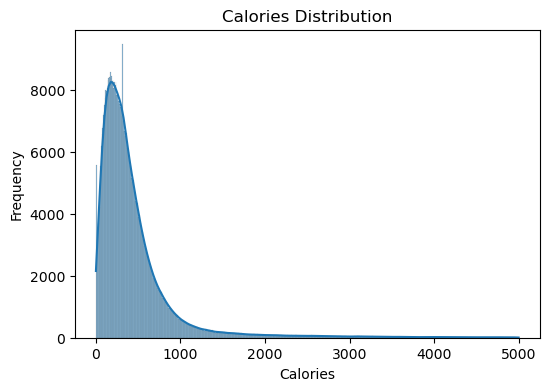

In [38]:
# plotting the distribution of calories values in the dataset  before normalization
plt.figure(figsize=(6, 4))
sns.histplot(recipe['Calories'], kde=True)
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


In [39]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000
mean,445.061745,23.525727,46.827550,17.151759,3.808165,627.498736,20.963626,78.593008
std,512.040543,36.901262,78.529928,21.993438,6.053171,890.323479,56.375739,111.855325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,123.300000,2.500000,3.800000
50%,315.400000,13.700000,28.100000,9.100000,2.200000,350.800000,6.400000,42.100000
75%,522.900000,27.300000,50.900000,25.000000,4.500000,781.125000,17.900000,106.200000
max,4999.800000,499.600000,999.600000,499.000000,195.200000,9996.100000,999.200000,999.900000


In [40]:
from sklearn.preprocessing import normalize
import pandas as pd


# Select the relevant numeric columns for similarity
nutrition_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 
                  'ProteinContent', 'FiberContent', 'SodiumContent', 
                  'SugarContent', 'CholesterolContent']

# Ensure there are no missing values — if needed, fill them first
recipe[nutrition_cols] = recipe[nutrition_cols].fillna(0)

# Apply L2 normalization (each row will have a unit norm)
normalized_array = normalize(recipe[nutrition_cols], norm='l2')

# Create a new DataFrame with normalized data
normalized_df = pd.DataFrame(normalized_array, columns=[col + '_norm' for col in nutrition_cols])

# Concatenate with original recipe DataFrame if needed
recipe = pd.concat([recipe, normalized_df], axis=1)


In [41]:
#get the name of diet first 10 
recipe['Name'].head(10)

0             low-fat berry blue frozen dessert
1                                       biryani
2                                 best lemonade
3                carina's tofu-vegetable kebabs
4                                  cabbage soup
5                          best blackbottom pie
6                        warm chicken a la king
7    buttermilk pie with gingersnap crumb crust
8                       a jad - cucumber pickle
9                          butter pecan cookies
Name: Name, dtype: object

In [42]:
# The 'Keywords' column is a list, so join it into a string for searching
def infer_meal_type(row):
    for field in ['RecipeCategory', 'Keywords', 'Name']:
        val = row[field]
        if isinstance(val, list):
            text = " ".join([str(x) for x in val]).lower()
        else:
            text = str(val).lower() if pd.notnull(val) else ''
        if 'breakfast' in text or 'brunch' in text:
            return 'breakfast'
        elif 'lunch' in text:
            return 'lunch'
        elif 'dinner' in text or 'supper' in text:
            return 'dinner'
        elif 'snack' in text:
            return 'snack'
    return 'general'

recipe['MealType'] = recipe.apply(infer_meal_type, axis=1)


In [43]:
recipe['MealType'].value_counts()

MealType
general      428631
breakfast     51495
lunch         40598
dinner         1419
snack           374
Name: count, dtype: int64

In [44]:

count=recipe['Images']=="character(0)"
print(f"Number of rows with 'Images' as 'character(0)': {count.sum()}")
# replace the character(0) with image not found
recipe['Images'] = recipe['Images'].replace("character(0)", "image not found")
recipe.head(5)

Number of rows with 'Images' as 'character(0)': 0


,Name,Description,Images,RecipeInstructions,Keywords,RecipeCategory,Calories,FatContent,CarbohydrateContent,ProteinContent,...,Type,Calories_norm,FatContent_norm,CarbohydrateContent_norm,ProteinContent_norm,FiberContent_norm,SodiumContent_norm,SugarContent_norm,CholesterolContent_norm,MealType
0,low-fat berry blue frozen dessert,make and share this low-fat berry blue frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,"[Toss 2 cups berries with sugar., Let stand fo...","[Dessert, Low Protein, Low Cholesterol, Health...",frozen desserts,170.9,2.5,37.1,3.2,...,vegetarian,0.948322,0.013872,0.205867,0.017757,0.019976,0.165360,0.167579,0.044392,general
1,biryani,make and share this biryani recipe from food.com.,[https://img.sndimg.com/food/image/upload/w_55...,[Soak saffron in warm milk for 5 minutes and p...,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...",chicken breast,1110.7,58.8,84.4,63.4,...,non-vegetarian,0.899876,0.047639,0.068380,0.051366,0.007292,0.298473,0.016528,0.302038,general
2,best lemonade,this is from one of my first good house keepi...,[https://img.sndimg.com/food/image/upload/w_55...,"[Into a 1 quart Jar with tight fitting lid, pu...","[Low Protein, Low Cholesterol, Healthy, Summer...",beverages,311.1,0.2,81.5,0.3,...,vegetarian,0.940619,0.000605,0.246417,0.000907,0.001209,0.005442,0.233416,0.000000,general
3,carina's tofu-vegetable kebabs,this dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,"[Drain the tofu, carefully squeezing out exces...","[Beans, Vegetable, Low Cholesterol, Weeknight,...",soy/tofu,536.1,24.0,64.2,29.3,...,vegetarian,0.324848,0.014543,0.038902,0.017754,0.010483,0.944429,0.019451,0.000000,general
4,cabbage soup,make and share this cabbage soup recipe from f...,[https://img.sndimg.com/food/image/upload/w_55...,"[Mix everything together and bring to a boil.,...","[Low Protein, Vegan, Low Cholesterol, Healthy,...",vegetable,103.6,0.4,25.1,4.3,...,vegetarian,0.107314,0.000414,0.026000,0.004454,0.004972,0.993693,0.018335,0.000000,general


In [45]:
#getting the images
recipe['Images'] = recipe['Images'].apply(lambda x: x if isinstance(x, list) else [x])
# Ensure all images are lists
recipe['Images'] = recipe['Images'].apply(lambda x: x if isinstance(x, list) else [x])
# Check the first few rows to confirm
recipe['Images'].head(5)

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object

In [46]:
recipe['Keywords'].dropna().head(10)

0    [Dessert, Low Protein, Low Cholesterol, Health...
1    [Chicken Thigh & Leg, Chicken, Poultry, Meat, ...
2    [Low Protein, Low Cholesterol, Healthy, Summer...
3    [Beans, Vegetable, Low Cholesterol, Weeknight,...
4    [Low Protein, Vegan, Low Cholesterol, Healthy,...
5           [Dessert, Weeknight, Stove Top, < 4 Hours]
6                           [Poultry, Meat, < 60 Mins]
7       [Dessert, Healthy, Weeknight, Oven, < 4 Hours]
8                 [Thai, Asian, Free Of..., < 30 Mins]
9    [Cookie & Brownie, Fruit, Nuts, Weeknight, Ove...
Name: Keywords, dtype: object

In [80]:
#creating the train final dataset cleaned_recipes.csv
recipe.to_csv('cleaned_recipes.csv', index=False)


In [ ]:
# import pandas as pd
# import re
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.preprocessing import MinMaxScaler
# from scipy.optimize import minimize



# nutrient=pd.read_csv('nutrient_cleaned.csv')
# calorie_lookup = dict(zip(nutrient['food'].str.lower(), nutrient['calories']))

# # -------------------------------------------
# # Helper Functions
# # -------------------------------------------
# def get_activity_multiplier(a):
#     return {
#         'walking': 1.2, 'yoga': 1.3, 'dancing': 1.45, 'weight training': 1.55,
#         'cycling': 1.6, 'basketball': 1.7, 'swimming': 1.75,
#         'tennis': 1.75, 'running': 1.8, 'hiit': 1.9
#     }.get(a.lower(), 1.2)

# def calculate_bmr(w, h, age, gender):
#     return 10 * w + 6.25 * h - 5 * age + (5 if gender else -161)

# def calorie_target(bmr, goal):
#     return bmr - 500 if goal == 'weight_loss' else bmr + 500 if goal == 'weight_gain' else bmr

# def calculate_bmi(w, h):
#     h /= 100
#     return round(w / (h * h), 2)

# def get_image_url(x):
#     if isinstance(x, list) and x:
#         return x[0]
#     if isinstance(x, str) and x.startswith('http'):
#         return x
#     return "Image not found"

# def optimize_ingredient_weights(ingredients, target_macros, recipe_name=""):
#     """
#     🎯 KEY FUNCTION: Optimizes ingredient quantities to match target calories/macros
#     Uses realistic portion sizes and cooking ratios
#     """
#     if len(ingredients) == 0:
#         return {}

#     # Define realistic portion ranges for different ingredient types
#     portion_guidelines = {
        
#     # Proteins - based on actual nutrient data ranges
#     'chicken': (100, 180),
#     'beef': (100, 180),
#     'fish': (120, 180),
#     'salmon': (100, 150),
#     'tuna': (100, 150),
#     'shrimp': (80, 120),
#     'egg': (50, 100),
#     'tofu': (80, 150),
#     'tempeh': (80, 120),
#     'turkey': (100, 180),
#     'pork': (100, 150),
#     'lamb': (100, 150),
#     'duck': (100, 150),
#     'cod': (120, 180),
#     'tilapia': (120, 180),
#     'mackerel': (100, 150),
#     'sardines': (80, 120),
#     'crab': (80, 120),
#     'lobster': (80, 120),
#     'scallops': (80, 120),
#     'mussels': (100, 150),
#     'oysters': (80, 120),
#     'cottage cheese': (100, 200),
#     'greek yogurt': (100, 200),
#     'protein powder': (25, 50),
#     'seitan': (80, 120),
    
#     # Legumes/Beans - higher protein, moderate calories
#     'lentils': (60, 100),
#     'chickpeas': (60, 100),
#     'beans': (60, 100),
#     'kidney beans': (60, 100),
#     'black beans': (60, 100),
#     'navy beans': (60, 100),
#     'lima beans': (60, 100),
#     'pinto beans': (60, 100),
#     'garbanzo beans': (60, 100),
#     'edamame': (80, 120),
#     'split peas': (60, 100),
#     'black-eyed peas': (60, 100),
#     'fava beans': (60, 100),
    
#     # Grains - based on dry weight from nutrient data
#     'rice': (50, 100),
#     'brown rice': (50, 100),
#     'quinoa': (40, 80),
#     'pasta': (60, 120),
#     'bread': (30, 60),
#     'oats': (40, 80),
#     'barley': (50, 100),
#     'bulgur': (40, 80),
#     'wheat': (50, 100),
#     'buckwheat': (40, 80),
#     'millet': (40, 80),
#     'amaranth': (40, 80),
#     'couscous': (50, 100),
#     'farro': (50, 100),
#     'wild rice': (50, 100),
#     'corn': (100, 150),
#     'polenta': (50, 100),
#     'tortilla': (30, 60),
#     'bagel': (80, 120),
#     'cereal': (30, 60),
#     'crackers': (20, 40),
#     'noodles': (60, 120),
    
#     # Vegetables - low calorie, can have larger portions
#     'broccoli': (100, 200),
#     'spinach': (50, 150),
#     'kale': (50, 150),
#     'carrot': (80, 150),
#     'tomato': (100, 200),
#     'onion': (50, 100),
#     'potato': (150, 250),
#     'sweet potato': (150, 250),
#     'bell pepper': (100, 200),
#     'cucumber': (100, 200),
#     'zucchini': (100, 200),
#     'cauliflower': (100, 200),
#     'cabbage': (100, 200),
#     'lettuce': (50, 150),
#     'mushrooms': (100, 200),
#     'asparagus': (100, 200),
#     'green beans': (100, 200),
#     'peas': (80, 150),
#     'celery': (100, 200),
#     'radish': (50, 100),
#     'beets': (100, 150),
#     'turnip': (100, 150),
#     'parsnip': (100, 150),
#     'leek': (80, 150),
#     'artichoke': (100, 200),
#     'brussels sprouts': (100, 200),
#     'eggplant': (100, 200),
#     'okra': (100, 200),
#     'squash': (100, 200),
#     'pumpkin': (100, 200),
#     'garlic': (5, 15),
#     'ginger': (5, 15),
#     'herbs': (5, 20),
#     'avocado': (80, 150),
    
#     # Fruits - moderate calories
#     'apple': (150, 250),
#     'banana': (120, 200),
#     'orange': (150, 250),
#     'berries': (80, 150),
#     'grapes': (100, 150),
#     'strawberries': (100, 200),
#     'blueberries': (80, 150),
#     'raspberries': (80, 150),
#     'blackberries': (80, 150),
#     'pear': (150, 250),
#     'peach': (150, 250),
#     'plum': (100, 200),
#     'apricot': (100, 200),
#     'kiwi': (100, 150),
#     'mango': (150, 250),
#     'pineapple': (150, 250),
#     'watermelon': (200, 300),
#     'cantaloupe': (200, 300),
#     'honeydew': (200, 300),
#     'cherries': (100, 150),
#     'grapefruit': (200, 300),
#     'lemon': (50, 100),
#     'lime': (30, 80),
#     'coconut': (30, 80),
#     'dates': (30, 60),
#     'figs': (50, 100),
#     'raisins': (30, 60),
#     'cranberries': (30, 60),
#     'pomegranate': (100, 150),
#     'papaya': (150, 250),
    
#     # Fats/Oils - very high calorie density
#     'oil': (5, 15),
#     'olive oil': (5, 15),
#     'coconut oil': (5, 15),
#     'butter': (5, 20),
#     'ghee': (5, 15),
#     'avocado oil': (5, 15),
#     'canola oil': (5, 15),
#     'sunflower oil': (5, 15),
#     'sesame oil': (5, 15),
#     'vegetable oil': (5, 15),
#     'margarine': (5, 20),
#     'lard': (5, 15),
#     'coconut butter': (10, 25),
    
#     # Nuts/Seeds - high calorie density
#     'almonds': (15, 30),
#     'peanuts': (15, 30),
#     'cashews': (15, 30),
#     'seeds': (10, 25),
#     'sesame seeds': (10, 20),
#     'walnuts': (15, 30),
#     'pecans': (15, 30),
#     'pistachios': (15, 30),
#     'hazelnuts': (15, 30),
#     'brazil nuts': (15, 30),
#     'macadamia nuts': (15, 30),
#     'pine nuts': (10, 25),
#     'sunflower seeds': (15, 30),
#     'pumpkin seeds': (15, 30),
#     'flax seeds': (10, 25),
#     'chia seeds': (10, 25),
#     'hemp seeds': (15, 30),
#     'poppy seeds': (10, 20),
#     'peanut butter': (15, 30),
#     'almond butter': (15, 30),
#     'tahini': (15, 30),
#     'nutella': (15, 30),
    
#     # Dairy
#     'milk': (200, 300),
#     'yogurt': (100, 200),
#     'cheese': (20, 50),
#     'cream cheese': (15, 30),
#     'sour cream': (15, 30),
#     'heavy cream': (15, 30),
#     'mozzarella': (20, 50),
#     'cheddar': (20, 50),
#     'parmesan': (10, 30),
#     'feta': (20, 50),
#     'goat cheese': (20, 50),
#     'ricotta': (50, 100),
#     'cream': (30, 60),
#     'buttermilk': (200, 300),
#     'kefir': (200, 300),
#     'ice cream': (50, 120),
    
#     # Beverages
#     'water': (200, 500),
#     'tea': (200, 400),
#     'coffee': (200, 400),
#     'juice': (150, 250),
#     'soda': (150, 300),
#     'coconut water': (200, 400),
#     'almond milk': (200, 300),
#     'soy milk': (200, 300),
#     'oat milk': (200, 300),
#     'rice milk': (200, 300),
#     'wine': (100, 150),
#     'beer': (300, 500),
#     'spirits': (30, 60),
    
#     # Condiments & Seasonings
#     'salt': (1, 5),
#     'pepper': (1, 3),
#     'vinegar': (5, 15),
#     'soy sauce': (5, 15),
#     'hot sauce': (2, 10),
#     'mustard': (5, 15),
#     'ketchup': (10, 20),
#     'mayonnaise': (10, 20),
#     'honey': (10, 25),
#     'maple syrup': (10, 25),
#     'sugar': (5, 15),
#     'brown sugar': (5, 15),
#     'vanilla': (2, 5),
#     'cinnamon': (1, 5),
#     'paprika': (1, 5),
#     'turmeric': (1, 5),
#     'cumin': (1, 5),
#     'oregano': (1, 5),
#     'basil': (2, 10),
#     'thyme': (1, 5),
#     'rosemary': (1, 5),
#     'parsley': (5, 15),
#     'cilantro': (5, 15),
#     'dill': (2, 10),
#     'mint': (2, 10),
#     'lemon juice': (5, 15),
#     'lime juice': (5, 15),
#     'balsamic vinegar': (5, 15),
#     'worcestershire sauce': (2, 10),
#     'fish sauce': (2, 10),
#     'coconut milk': (50, 100),
#     'tomato paste': (10, 25),
#     'tomato sauce': (50, 100),
#     'pesto': (10, 25),
#     'salsa': (30, 60),
#     'hummus': (30, 60),
#     'guacamole': (30, 60),
    
#     # Snacks & Processed Foods
#     'chips': (20, 50),
#     'pretzels': (20, 50),
#     'popcorn': (20, 50),
#     'chocolate': (20, 50),
#     'cookies': (20, 50),
#     'cake': (50, 100),
#     'pie': (80, 150),
#     'candy': (20, 50),
#     'granola': (30, 60),
#     'energy bar': (30, 60),
#     'protein bar': (40, 80),
#     'trail mix': (30, 60),
#     'jerky': (20, 40),
#     'pizza': (100, 200),
#     'sandwich': (150, 300),
#     'burrito': (200, 400),
#     'taco': (80, 150),
#     'soup': (200, 400),
#     'salad': (100, 300),
# }
    
    
#     def get_realistic_portions(ing_name):
#         ing_lower = ing_name.lower()
#         for key, (min_g, max_g) in portion_guidelines.items():
#             if key in ing_lower or ing_lower in key:
#                 return min_g, max_g
#         return portion_guidelines['default']

#     # Build nutrition matrix with realistic constraints
#     valid_ingredients = []
#     bounds = []
#     base_portions = []
    
#     for ing in ingredients:
#         row = nutrient[nutrient['food'].str.lower() == ing.lower()]
#         if not row.empty:
#             valid_ingredients.append(ing)
#             min_g, max_g = get_realistic_portions(ing)
#             bounds.append((min_g/100, max_g/100))  # Convert to 100g units
#             base_portions.append((min_g + max_g) / 200)  # Average as starting point

#     if len(valid_ingredients) == 0:
#         return {}

#     # Create nutrition matrix (per 100g)
#     nutrition_matrix = []
#     macros = ['calories', 'protein', 'fat', 'carbs', 'fiber']
    
#     for ing in valid_ingredients:
#         row = nutrient[nutrient['food'].str.lower() == ing.lower()]
#         nutrition_row = []
#         for macro in macros:
#             value = row[macro].values[0] if macro in row.columns else 0
#             nutrition_row.append(value)
#         nutrition_matrix.append(nutrition_row)
    
#     nutrition_matrix = np.array(nutrition_matrix)
#     target = np.array(target_macros)

#     def objective_function(portions):
#         # Calculate predicted nutrition
#         predicted = nutrition_matrix.T @ portions
        
#         # Weighted error (calories most important, then protein)
#         weights = np.array([2.0, 1.5, 1.0, 1.0, 0.5])  # calories, protein, fat, carbs, fiber
#         errors = np.abs(predicted - target) / (target + 1e-6)  # Relative error
        
#         # Penalty for unrealistic total portion size
#         total_weight = sum(portions) * 100  # Convert back to grams
#         if total_weight > 800:  # Penalty if meal > 800g
#             size_penalty = (total_weight - 800) / 100
#         else:
#             size_penalty = 0
            
#         return np.sum(weights * errors**2) + size_penalty

#     try:
#         # Use realistic starting portions
#         initial_portions = np.array(base_portions)
        
#         # Optimize with realistic bounds
#         result = minimize(
#             objective_function, 
#             initial_portions, 
#             bounds=bounds, 
#             method='SLSQP',
#             options={'maxiter': 1000}
#         )
        
#         if result.success:
#             optimized_portions = result.x
#         else:
#             # Fallback to proportional scaling
#             target_calories = target_macros[0]
#             total_base_calories = sum(
#                 nutrition_matrix[i][0] * base_portions[i] 
#                 for i in range(len(valid_ingredients))
#             )
#             if total_base_calories > 0:
#                 scale_factor = min(2.0, target_calories / total_base_calories)
#                 optimized_portions = [p * scale_factor for p in base_portions]
#             else:
#                 optimized_portions = base_portions
        
#         # Convert to readable format
#         quantities = {}
#         total_cals = 0
        
#         for i, ing in enumerate(valid_ingredients):
#             grams = round(optimized_portions[i] * 100)
#             if grams >= 5:  # Only include meaningful amounts
#                 quantities[ing] = f"{grams}g {ing}"
#                 # Calculate calories for this ingredient
#                 ing_cals = nutrition_matrix[i][0] * optimized_portions[i]
#                 total_cals += ing_cals
        
      
        
#         return quantities
        
#     except Exception as e:
#         print(f"❌ Optimization failed for {recipe_name}: {e}")
#         # Simple fallback: reasonable portions
#         fallback_quantities = {}
#         for ing in valid_ingredients[:3]:  # Limit to 3 main ingredients
#             min_g, max_g = get_realistic_portions(ing)
#             avg_g = (min_g + max_g) // 2
#             fallback_quantities[ing] = f"{avg_g}g {ing}"
#         return fallback_quantities

# def inject_quantities_into_instructions(instructions, quantities):
#     """
#     🔄 Injects calculated quantities into recipe instructions
#     """
#     if isinstance(instructions, str):
#         instructions = [instructions]

#     updated_steps = []
#     for step in instructions:
#         original_step = step
#         for ing, qty in quantities.items():
#             # Match the whole word, case insensitive, and replace only once per step
#             pattern = rf'\b{re.escape(ing)}\b'
#             step, count = re.subn(pattern, qty, step, count=1, flags=re.IGNORECASE)
#             if count > 0:
#                 continue

#         # Clean up leading numbers/symbols and capitalize first letter
#         clean_step = re.sub(r'^[0-9. )-]+', '', step).strip()
#         if clean_step:
#             clean_step = clean_step[0].upper() + clean_step[1:]

#         updated_steps.append(clean_step if clean_step else original_step)

#     # Number the steps
#     return '\n'.join(f"{i+1}. {line}" for i, line in enumerate(updated_steps))

# # -------------------------------------------
# # Main Function
# # -------------------------------------------
# def suggest_diet(user_input: dict, recipe_df: pd.DataFrame, max_meals: int = 6, tolerance: float = 0.05):
#     """
#     🍽️ Main function that suggests optimized diet plan
#     """
#     nutrient_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent']
#     df = recipe_df.copy()

#     # ---------------- Filters ----------------
#     df = df[df['Type'].str.lower() == user_input['Type'].lower()]
#     df = df[df['MealType'].str.lower() == user_input['meal_type'].lower()]
    
#     # Apply health condition filters
#     for cond in [c.lower() for c in user_input.get('health_conditions', [])]:
#         if cond == 'diabetes':
#             df = df[df['SugarContent'] <= 10]
#         elif cond == 'hypertension':
#             df = df[df['SodiumContent'] <= 400]
#         elif cond == 'asthma':
#             df = df[~df['RecipeInstructions'].astype(str).str.contains('dairy', na=False, case=False)]
#         elif cond == 'allergy':
#             for allergen in [a.lower() for a in user_input.get('allergies', [])]:
#                 df = df[~df['RecipeInstructions'].astype(str).str.contains(allergen, na=False, case=False)]
#                 if 'RecipeIngredientParts' in df.columns:
#                     df = df[~df['RecipeIngredientParts'].astype(str).str.contains(allergen, na=False, case=False)]

#     if df.empty:
#         return {
#             "bmr": None, "bmi": None, "tdee": None,
#             "calorie_target": None, "actual_calories": 0, "diet_plan": []
#         }

#     # ---------------- Calculations ----------------
#     bmr = calculate_bmr(user_input['weight_kg'], user_input['height_cm'], user_input['age'], user_input['gender'])
#     tdee = round(bmr * get_activity_multiplier(user_input['activity_type']), 2)
    
#     goal = re.sub(r'[^a-z]', '_', user_input['goal'].lower())
#     goal_key = {
#         'wt_loss': 'weight_loss', 'weight_loss': 'weight_loss',
#         'wt_gain': 'weight_gain', 'weight_gain': 'weight_gain',
#         'maintain': 'maintain'
#     }.get(goal, 'maintain')
    
#     cal_target = round(calorie_target(tdee, goal_key), 2)
#     bmi = calculate_bmi(user_input['weight_kg'], user_input['height_cm'])

#     # ---------------- Nutrition Vector ----------------
#     df = df.dropna(subset=nutrient_cols)
#     df[nutrient_cols] = df[nutrient_cols].apply(pd.to_numeric, errors='coerce')
#     df = df.dropna(subset=nutrient_cols)

#     target_vec = [
#         cal_target,
#         cal_target * 0.25 / 9,  # fat
#         cal_target * 0.5 / 4,   # carbs
#         cal_target * 0.25 / 4,  # protein
#         10                     # fiber
#     ]

#     scaler = MinMaxScaler()
#     scaled = scaler.fit_transform(df[nutrient_cols])
#     sim = cosine_similarity([scaler.transform([target_vec])[0]], scaled)[0]
#     df['similarity'] = sim

#     # ---------------- Meal Selection & Optimization ----------------
#     diet, kcal_sum = [], 0
#     for _, row in df.sort_values('similarity', ascending=False).iterrows():
#         if len(diet) >= max_meals or kcal_sum >= cal_target * (1 - tolerance):
#             break

#         # Extract ingredients from recipe
#         instr = row.get('RecipeInstructions', '')
#         ingredient_text = row.get('RecipeIngredientParts', '')
        
#         # Combine instruction and ingredient text for ingredient extraction
#         combined_text = ' '.join(instr if isinstance(instr, list) else [str(instr)]) + ' ' + str(ingredient_text)
        
#         # Find ingredients that exist in our nutrient database
#         found_ings = []
#         for ingredient in nutrient['food'].str.lower():
#             if re.search(rf'\b{re.escape(ingredient)}\b', combined_text.lower()):
#                 found_ings.append(ingredient)
        
#         found_ings = list(set(found_ings))
#         # print(f"🔍 Found ingredients for {row['Name']}: {found_ings}")

#         # Target macros for this specific meal
#         target_macros = [
#             row['Calories'],
#             row['ProteinContent'],
#             row['FatContent'],
#             row['CarbohydrateContent'],
#             row['FiberContent']
#         ]

#         # 🎯 OPTIMIZE INGREDIENT QUANTITIES
#         optimized_quantities = optimize_ingredient_weights(found_ings, target_macros, row['Name'])
#         # print(f"⚖️ Optimized quantities: {optimized_quantities}")
        
#         # Inject quantities into instructions
#         instructions_with_quantities = inject_quantities_into_instructions(instr, optimized_quantities)

#         # Calculate actual nutritional values based on optimized quantities
#         actual_calories = 0
#         actual_protein = 0
#         actual_fat = 0
#         actual_carbs = 0
#         actual_fiber = 0
        
#         for ing, qty_str in optimized_quantities.items():
#             # Extract grams from string like "150g broccoli"
#             grams_match = re.search(r'(\d+)g', qty_str)
#             if grams_match:
#                 grams = int(grams_match.group(1))
#                 ing_data = nutrient[nutrient['food'].str.lower() == ing.lower()]
#                 if not ing_data.empty:
#                     multiplier = grams / 100  # per 100g
#                     actual_calories += ing_data['calories'].values[0] * multiplier
#                     actual_protein += ing_data['protein'].values[0] * multiplier
#                     actual_fat += ing_data['fat'].values[0] * multiplier
#                     actual_carbs += ing_data['carbs'].values[0] * multiplier
#                     actual_fiber += ing_data['fiber'].values[0] * multiplier
        
#         # If no ingredients were optimized, use original recipe values
#         if actual_calories == 0:
#             actual_calories = row['Calories']
#             actual_protein = row['ProteinContent']
#             actual_fat = row['FatContent']
#             actual_carbs = row['CarbohydrateContent']
#             actual_fiber = row['FiberContent']

#         # Add meal to diet plan
#         diet.append({
#             'Name': row['Name'],
#             'Target Calories': round(row['Calories'], 1),
#             'Optimized Calories': round(actual_calories, 1),
#             'Calories (kcal)': round(actual_calories, 1),
#             'Fat (g)': round(actual_fat, 1),
#             'Carbs (g)': round(actual_carbs, 1),
#             'Protein (g)': round(actual_protein, 1),
#             'Fiber (g)': round(actual_fiber, 1),
#             'Sugar (g)': round(row.get('SugarContent', 0), 1),
#             'Sodium (mg)': round(row.get('SodiumContent', 0), 1),
#             'Image': get_image_url(row.get('Images')),
#             'Optimized Ingredients': list(optimized_quantities.values()),
#             'Instructions': instructions_with_quantities,
#             'Calorie Match %': round((actual_calories / row['Calories']) * 100, 1) if row['Calories'] > 0 else 0
#         })

#         kcal_sum += actual_calories

#     return {
#         "bmr": round(bmr, 2),
#         "bmi": bmi,
#         "tdee": tdee,
#         "calorie_target": cal_target,
#         "actual_calories": round(kcal_sum, 1),
#         "diet_plan": diet,
#         "calorie_accuracy": round((kcal_sum / cal_target) * 100, 1) if cal_target > 0 else 0
#     }

# # -------------------------------------------
# # Example Usage
# # -------------------------------------------
# if __name__ == "__main__":
#     user_input = {
#         'gender': 0,  # 1 for male, 0 for female
#         'age': 20,
#         'height_cm': 150,
#         'weight_kg': 50,
#         'goal': 'maintain',
#         'Type': 'non-vegetarian',
#         'meal_type': 'general',
#         'health_conditions': ['hypertension'],  # e.g. ['diabetes', 'hypertension'],
#         'activity_type': 'yoga'
#     }

#     print("🔄 Generating optimized diet plan...")
#     result = suggest_diet(user_input,recipe)

#     print("\n" + "="*60)
#     print("📊 DIET OPTIMIZATION RESULTS")
#     print("="*60)
#     print(f"🔥 BMR: {result['bmr']} kcal/day")
#     print(f"📈 BMI: {result['bmi']}")
#     print(f"⚡ TDEE: {result['tdee']} kcal/day")
#     print(f"🎯 Calorie Target: {result['calorie_target']} kcal/day")
#     print(f"✅ Actual Calories: {result['actual_calories']} kcal/day")
#     print(f"🎪 Accuracy: {result['calorie_accuracy']}%")
#     print(f"🍽️ Number of meals: {len(result['diet_plan'])}")

#     print("\n" + "="*60)
#     print("🍽️ OPTIMIZED MEAL PLAN")
#     print("="*60)

#     for i, meal in enumerate(result['diet_plan'], 1):
#         print(f"\n🥗 Meal {i}: {meal['Name']}")
#         print(f"   Calories: {meal['Calories (kcal)']}")
        

#         print(f"   🥩 Protein: {meal['Protein (g)']}g")
#         print(f"   🧈 Fat: {meal['Fat (g)']}g") 
#         print(f"   🍞 Carbs: {meal['Carbs (g)']}g")
#         print(f"   🌾 Fiber: {meal['Fiber (g)']}g")
#         print(f"   📝  Ingredients:")
#         for ingredient in meal['Optimized Ingredients']:
#             print(f"      • {ingredient}")
#         print(f"   👨‍🍳 Instructions:")
#         for line in meal['Instructions'].split('\n'):
#             print(f"      {line}")

🔄 Generating optimized diet plan...


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



📊 DIET OPTIMIZATION RESULTS
🔥 BMR: 1176.5 kcal/day
📈 BMI: 22.22
⚡ TDEE: 1529.45 kcal/day
🎯 Calorie Target: 1529.45 kcal/day
✅ Actual Calories: 1489.0 kcal/day
🎪 Accuracy: 97.4%
🍽️ Number of meals: 3

🍽️ OPTIMIZED MEAL PLAN

🥗 Meal 1: chicken tetrazzini
   Calories: 222.0
   🥩 Protein: 6.7g
   🧈 Fat: 1.1g
   🍞 Carbs: 46.7g
   🌾 Fiber: 2.2g
   📝  Ingredients:
      • 60g noodles
   👨‍🍳 Instructions:
      1. Cook the spaghetti according to their package instructions; drain
      2. But do not rinse.
      3. Mix all other ingredients together in a large bowl.
      4. Mix the hot spaghetti 60g noodles into the bowl as well.
      5. Pour the bowl mixture into a casserole dish.
      6. Bake the dish at 375 for 30 minutes.

🥗 Meal 2: seared duck breasts with cherry rhubarb chutney
   Calories: 352.7
   🥩 Protein: 0.4g
   🧈 Fat: 0.2g
   🍞 Carbs: 88.4g
   🌾 Fiber: 1.0g
   📝  Ingredients:
      • 121g duck
      • 15g sugar
   👨‍🍳 Instructions:
      1. Combine first 10 ingredients in a lar